# Big Data Assignment

## Import libraries

In [113]:
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [114]:
today = datetime.now()

## Read in data from JSON

In [115]:
data_file = 'arxiv-metadata-oai-snapshot.json'

def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

In [116]:
ids = []
titles = []
comments = []
journalrefs = []
categories = []
created = []

metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    title = paper_dict.get('title')
    comment = paper_dict.get('comments')
    if "COVID" not in title and comment != None and comment != np.nan: 
        ids.append(paper_dict.get('id'))
        titles.append(title)
        comments.append(comment)
        journalrefs.append(paper_dict.get('journal-ref'))
        categories.append(paper_dict.get('categories'))
        created.append(paper_dict.get('update_date'))        
    else:
        pass 

len(ids), len(titles), len(comments), len(journalrefs), len(categories), len(created)

(1598967, 1598967, 1598967, 1598967, 1598967, 1598967)

In [117]:
papers = pd.DataFrame({
    'id':ids,
    'title': titles,
    'comments': comments,
    'journal_ref': journalrefs,
    'categories':categories,
    'update_date':created
})

## Validate that the data is what we expected

In [118]:
papers.head()

,id,title,comments,journal_ref,categories,update_date
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,2008-11-26
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,math.CO cs.CG,2008-12-13
2,0704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,physics.gen-ph,2008-01-13
3,0704.0004,A determinant of Stirling cycle numbers counts...,11 pages,None,math.CO,2007-05-23
4,0704.0006,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",None,cond-mat.mes-hall,2015-05-13


In [119]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598967 entries, 0 to 1598966
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1598967 non-null  object
 1   title        1598967 non-null  object
 2   comments     1598967 non-null  object
 3   journal_ref  650361 non-null   object
 4   categories   1598967 non-null  object
 5   update_date  1598967 non-null  object
dtypes: object(6)
memory usage: 73.2+ MB


In [120]:
papers.shape

(1598967, 6)

In [121]:
papers.describe()

,id,title,comments,journal_ref,categories,update_date
count,1598967,1598967,1598967,650361,1598967,1598967
unique,1598963,1595739,990997,646467,58546,4457
top,math-ph/0408005,Discussion of: A statistical analysis of multi...,10 pages,"Dans Design, Automation and Test in Europe - D...",astro-ph,2007-05-23
freq,2,12,7133,127,85700,117951


In [122]:
# Convert date to datetime object
papers["update_date"] = pd.to_datetime(papers["update_date"])
print((papers.update_date < today).all())

True


## 3.1 Data Wrangling

In [123]:
# First strip leading / trailing blanks
papers['id'] = papers['id'].str.strip()
papers['title'] = papers['title'].str.strip()
papers['comments'] = papers['comments'].str.strip()
papers['journal_ref'] = papers['journal_ref'].str.strip()
papers['categories'] = papers['categories'].str.strip()


In [124]:
papers.describe()

C:\Users\rhian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,id,title,comments,journal_ref,categories,update_date
count,1598967,1598967,1598967,650361,1598967,1598967
unique,1598963,1595739,990997,646467,58546,4457
top,math-ph/0408005,Discussion of: A statistical analysis of multi...,10 pages,"Dans Design, Automation and Test in Europe - D...",astro-ph,2007-05-23 00:00:00
freq,2,12,7133,127,85700,117951
first,NaN,NaN,NaN,NaN,NaN,2007-05-23 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2022-05-07 00:00:00


In [125]:
# Drop general duplicates
papers.drop_duplicates()

,id,title,comments,journal_ref,categories,update_date
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,2008-11-26
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,math.CO cs.CG,2008-12-13
2,0704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,physics.gen-ph,2008-01-13
3,0704.0004,A determinant of Stirling cycle numbers counts...,11 pages,None,math.CO,2007-05-23
4,0704.0006,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",None,cond-mat.mes-hall,2015-05-13
...,...,...,...,...,...,...
1598962,supr-con/9608008,On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",None,supr-con cond-mat.supr-con,2009-10-30
1598963,supr-con/9609001,Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",None,supr-con cond-mat.supr-con,2016-11-18
1598964,supr-con/9609002,Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",None,supr-con cond-mat.supr-con,2009-10-30
1598965,supr-con/9609003,Density of States and NMR Relaxation Rate in A...,"7 pages, 4 PostScript Figures, LaTeX, to appea...",None,supr-con cond-mat.supr-con,2009-10-30


In [126]:
# Check for NaNs
papers.isnull().sum()

id                  0
title               0
comments            0
journal_ref    948606
categories          0
update_date         0
dtype: int64

In [127]:
# As I want to look at how words in the title correlate to journal_ref, the nulls will skew things
# For that reason I am going to drop rows with nulls - this is not ideal as there are a LOT of them
# Another option would be to predict journal ref, but given time available, I am choosing to drop for now
papers.dropna(inplace=True)

In [128]:
# We can see from above that there are still some duplicated IDs - let's deal with those first
# IDs should be unique and here they are not
papers[papers.duplicated("id", keep=False)].sort_values("id")

,id,title,comments,journal_ref,categories,update_date
1497148,math-ph/0207039,Bound State Solutions of the Dirac Equation in...,"17 pages, 3 figures, small corrections and imp...","Math. Nachr. 274-275 (2004), pages 117 - 129",math-ph gr-qc math.MP,2020-10-26
1534634,math-ph/0207039,Bound State Solutions of the Dirac Equation in...,"17 pages, 3 figures, small corrections and imp...","Math. Nachr. 274-275 (2004), pages 117 - 129",math-ph gr-qc math.MP,2020-10-26
1497380,math-ph/0212014,A semiclassically entangled puzzle,"Letter, 5 pages","J. Phys. A, 40 (2007) F1047-F1052 [revised ver...",math-ph math.MP quant-ph,2014-03-12
1540428,math-ph/0212014,A semiclassically entangled puzzle,"Letter, 5 pages","J. Phys. A, 40 (2007) F1047-F1052",math-ph math.MP math.SG quant-ph,2020-08-20
1498508,math-ph/0408005,Nonholonomic systems via moving frames: Cartan...,Dedicated to Alan Weinstein on his 60th birthd...,Progress in Mathematics 232 (2005) 75-120 [rev...,math-ph math.MP,2014-03-13
1540429,math-ph/0408005,Nonholonomic systems via moving frames: Cartan...,Dedicated to Alan Weinstein on his 60th birthd...,Progress in Mathematics 232 (2005) 75-120 [rev...,math-ph math.MP math.SG,2020-08-18
1498582,math-ph/0409039,Moyal star product approach to the Bohr-Sommer...,"27 pages, no figures","J. Phys. A, 38 (2005) 1977-2004 [revised versi...",math-ph math.MP,2015-06-26
1540430,math-ph/0409039,Moyal star product approach to the Bohr-Sommer...,"27 pages, no figures","J. Phys. A, 38 (2005) 1977-2004 [revised versi...",math-ph math.MP math.SG,2020-08-18


In [129]:
# These look like actual duplicates which are not picked up by "drop duplicates" due to revisions in "journal ref" 
# Therefore drop duplicates and keep last (this appears to be the revised version)
papers.drop_duplicates(subset='id', keep='last', inplace=True)
# Reset the index
papers.reset_index(drop=True, inplace=True)
# papers.describe()

In [130]:
papers[papers.duplicated("title", keep=False)].sort_values("title")
# This appears to be the same article published in different journals - so keep these - no need to drop

,id,title,comments,journal_ref,categories,update_date
11951,0709.3070,3D SPH simulations of grain growth in protopla...,"6 pages, 4 figures, to appear in the proceedin...",Dans SF2A-2007: Semaine de l'Astrophysique Fra...,astro-ph,2007-09-20
18129,0712.0772,3D SPH simulations of grain growth in protopla...,"3 pages, 3 figures, to appear in the Proceedin...",Dans Proceedings of IAU Symp. 249 - Exoplanets...,astro-ph,2009-11-13
638078,physics/9902013,A Compton Backscattering Polarimeter for Measu...,"5 pages, 5 figures","Polarized Gas Targets and Polarized Beams, R. ...",physics.ins-det nucl-ex,2007-05-23
638077,physics/9902011,A Compton Backscattering Polarimeter for Measu...,"20 pages, 10 figures",Nucl.Instrum.Meth. A414 (1998) 446-458,physics.ins-det hep-ex nucl-ex,2007-05-23
526894,hep-lat/0311021,A Lattice Formulation of Super Yang-Mills Theo...,"29 pages, 1 figure, LaTeX, (v2) problem on deg...","JHEP0401:015,2004",hep-lat hep-th math-ph math.MP,2009-11-10
...,...,...,...,...,...,...
572992,hep-th/0109160,Yang-Mills Integrals,"LaTeX, 10 pages, references added and minimal ...",J.Phys. A35 (2002) L51-L59,hep-th math-ph math.MP,2009-11-07
620935,nucl-ex/0009009,"n-p Short-Range Correlations from (p,2p + n) M...","4 pages, 2 figures, to be published in The Pro...",AIP Conf.Proc. 549 (2002) 451-454,nucl-ex,2019-08-17
621238,nucl-ex/0206003,"n-p Short-Range Correlations from (p,2p + n) M...","4 pages and 4 figures, submitted to Phys. Rev....",Phys.Rev.Lett. 90 (2003) 042301,nucl-ex,2009-11-07
590691,hep-th/9403042,"q-oscillators, (non-)Kaehler manifolds and con...","Latex (7 pages), Saclay T93/027",Mod.Phys.Lett. A10 (1995) 941-948,hep-th,2015-06-26


In [131]:
# Remove items where the article has been withdrawn
papers = papers[papers.title.str.lower() != "withdrawn"]

In [132]:
# Extract year published
papers["year_published"] = papers['journal_ref'].str.extract(r'(?<!\d)(199\d{1}|200\d{1}|201\d{1}|2020|2021|2022)(?!\d)', expand=False)

In [133]:
papers["year_published"] = papers["year_published"].astype(float)

In [134]:
# Extract year published
# papers["year_published"].value_counts().sort_values()

In [135]:
# Group into wider categories by main category got from arXiv website
cat_dict={'math':'Mathematics','cs':'Computer Science','stat':'Statistics',
           'q-bio':'Quantitative Biology','q-fin':'Quantitative Finance',
          'econ': 'Economics', 'eess':'Electrical Engineering and System Sciences', 
         "astro-ph": "Physics", 'cond-mat': "Physics", 'gr-qc': "Physics", 'hep-ex': "Physics", 
          'hep-lat': "Physics", 'hep-ph': "Physics", 'hep-th': "Physics", 'math-ph': "Physics",
          'nlin': "Physics", 'nucl-ex': "Physics", 'nucl-th': "Physics", 'physics': "Physics", 
          'quant-ph': "Physics"
         }

category_list = []

for i in range(0,len(papers)):
    catego = papers.loc[i,'categories'].split(' ')
    ncat = set()
    for i in catego:
        
        if(i.find('.')>0):
            x = str(i[0:i.find('.')])
            if(x in cat_dict.keys()):
                ncat.add(cat_dict[x])   
        
        else:
            if(i in cat_dict.keys()):
                ncat.add(cat_dict[i])


    category_list.append(list(ncat))

papers['main_category'] = category_list
papers["main_category"] = papers["main_category"].str[0]

## Write data to CSV (requested in Task 3)
Create a new dataset in csv format with only records containing comments and without the word COVID in the title. This new dataset will have only 5 columns: id, title, comments, journal-ref and categories.

In [136]:
# Write to csv as requested in "Task" section
# papers.to_csv(index=False)

## 3.2 Descriptive Analysis

In [137]:
# First let's just check the final dataset's first 5 rows
papers.head()

,id,title,comments,journal_ref,categories,update_date,year_published,main_category
0,0704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,2008-11-26,2007.0,Physics
1,0704.0007,Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",gr-qc,2008-11-26,2007.0,Physics
2,0704.0008,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",cond-mat.mtrl-sci,2009-02-05,2008.0,Physics
3,0704.0015,Fermionic superstring loop amplitudes in the p...,22 pages; signs and coefficients adjusted for ...,"JHEP 0705:034,2007",hep-th,2009-11-13,2007.0,Physics
4,0704.0016,Lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph,2008-12-18,2008.0,Physics


In [138]:
# Next let's look at the most-often used categories - we can use this later!
print(papers['categories'].value_counts().head(10))

hep-ph               44958
astro-ph             38712
hep-th               34947
quant-ph             28848
gr-qc                16653
cond-mat.mes-hall    15646
cond-mat.str-el      13321
nucl-th              11488
cond-mat.mtrl-sci    10416
hep-ex                8924
Name: categories, dtype: int64


In [139]:
# What about main category though?
print(papers['main_category'].value_counts().head(10))

Physics                                       540120
Mathematics                                    61587
Computer Science                               31634
Quantitative Biology                            8574
Electrical Engineering and System Sciences      3268
Statistics                                      2762
Quantitative Finance                            2296
Economics                                        116
Name: main_category, dtype: int64


In [140]:
# And what about journal references? Are there journals listed multiple times? 
print(papers['journal_ref'].value_counts().head(10))

Dans Design, Automation and Test in Europe - DATE'05, Munich :\n  Allemagne (2005)                                               127
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2008, Nice : France (2008)                      77
Prog Theor Exp Phys (2020)                                                                                                        74
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/MOEMS - DTIP 2007, Stresa, lago Maggiore : Italie (2007)     66
Prog Theor Exp Phys (2018)                                                                                                        53
Prog Theor Exp Phys (2019)                                                                                                        53
Prog Theor Exp Phys (2017)                                                                                                        52
Dans Symposium on Design, Test, Integration and Packaging of\n  MEMS/

[Text(0.5, 1.0, 'Histogram of Publication Year')]

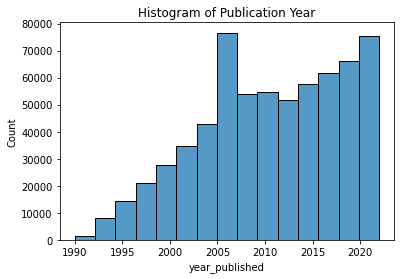

In [141]:
# Using the extracted "year_published" feature, let's look at the distribution of when a paper was published
sns.histplot(papers, x="year_published", bins=15).set(title="Histogram of Publication Year")

[Text(0.5, 1.0, 'Histogram of Last Updated Date')]

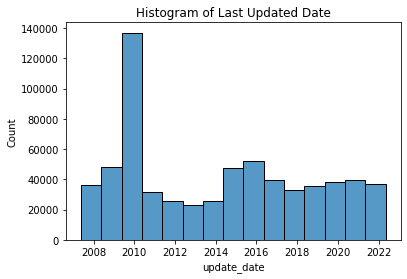

In [142]:
# We can compare this to the updated date - an interesting difference, and a big spike in updated date in approx 2010
# Let's look at why this is later
sns.histplot(papers, x="update_date", bins=15).set(title="Histogram of Last Updated Date")

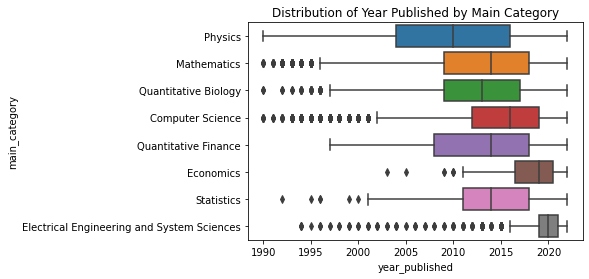

In [143]:
# Does publication year change according to category?
ax = sns.boxplot(x="year_published", y="main_category", data=papers).set(title="Distribution of Year Published by Main Category")

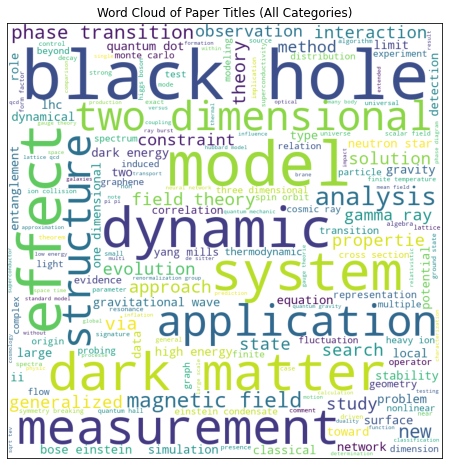

In [144]:
# # Word Cloud - let's visualise the most-often used words in the titles of papers

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['using', 'based'])
 
# Iterate through "title" feature
for val in papers.title:
     
    val = str(val)
    tokens = val.split()
     
    # Convert each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# Plot WordCloud                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.title("Word Cloud of Paper Titles (All Categories)")
plt.imshow(wordcloud)

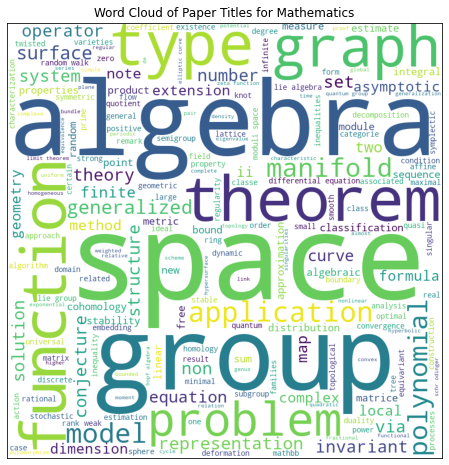

In [145]:
# # Next let's look at Mathematics

papers_math = papers[(papers.main_category == "Mathematics")]

comment_words = ''

# Iterate through "title" feature
for val in papers_math.title:
     
    val = str(val)
    tokens = val.split()
     
    # Convert each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# Plot WordCloud                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.title("Word Cloud of Paper Titles for Mathematics")
plt.imshow(wordcloud)

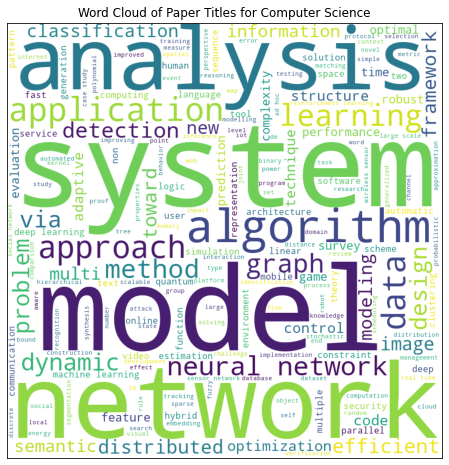

In [146]:
# # Next the category CompSci:
papers_cs = papers[(papers.main_category == "Computer Science")]

comment_words = ''

# Iterate through "title" feature
for val in papers_cs.title:
     
    val = str(val)
    tokens = val.split()
     
    # Convert each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# Plot WordCloud                       
plt.figure(figsize = (12, 8), facecolor = None)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.title("Word Cloud of Paper Titles for Computer Science")
plt.imshow(wordcloud)

## 3.3 Diagnostic Analysis

### Relationship b/w journal ref and categories?

In [147]:
# Is there a correlation between journal_ref and categories?
# To look at this, let's count the top journal_refs by category for the top 3 categories.
papers_phys = papers[(papers.main_category == "Physics")]
phys_vc = dict(papers_phys['journal_ref'].value_counts())
phys_tot = len(papers_phys)
phys_j = pd.DataFrame.from_dict(phys_vc, orient="index", columns=['count'])
phys_j["percent"] = phys_j['count']/phys_tot*100
phys_j.reset_index(inplace=True)
phys_j.rename(columns={"index": "journal_ref"}, inplace=True)
phys_j.head(10)

,journal_ref,count,percent
0,Prog Theor Exp Phys (2020),74,0.013701
1,Prog Theor Exp Phys (2019),53,0.009813
2,Prog Theor Exp Phys (2018),53,0.009813
3,Prog Theor Exp Phys (2017),52,0.009627
4,Dans Proceedings of 12th International Worksho...,37,0.006850
5,Prog Theor Exp Phys (2022),31,0.005739
6,Dans 13th International Worshop on THERMal INv...,29,0.005369
7,Prog Theor Exp Phys (2021),27,0.004999
8,"Dans European Nano Systems Worshop - ENS 2005,...",21,0.003888
9,"Dans European Nano Systems Worshop - ENS 2006,...",20,0.003703


In [148]:
math_vc = dict(papers_math['journal_ref'].value_counts())
math_tot = len(papers_math)
math_j = pd.DataFrame.from_dict(math_vc, orient="index", columns=['count'])
math_j["percent"] = math_j['count']/math_tot*100
math_j.reset_index(inplace=True)
math_j.rename(columns={"index": "journal_ref"}, inplace=True)
math_j.head(10)

,journal_ref,count,percent
0,"Published by InfoLearnQuest, Ann Arbor, United...",7,0.011366
1,Transformation Groups (2020),4,0.006495
2,"Linear and Multilinear Algebra, 2021",4,0.006495
3,"The Ramanujan Journal, 2020",4,0.006495
4,The Ramanujan Journal (2020),4,0.006495
5,Communications in Algebra (2020),4,0.006495
6,part of Pure and Applied Mathematics Quarterly...,3,0.004871
7,J Geom Anal (2020),3,0.004871
8,"Published in 2010 by Svenska fysikarkivet, Sto...",3,0.004871
9,"International Mathematics Research Notices, 2021",3,0.004871


In [149]:
cs_vc = dict(papers_cs['journal_ref'].value_counts())
cs_tot = len(papers_cs)
cs_j = pd.DataFrame.from_dict(cs_vc, orient="index", columns=['count'])
cs_j["percent"] = cs_j['count']/cs_tot*100
cs_j.reset_index(inplace=True)
cs_j.rename(columns={"index": "journal_ref"}, inplace=True)
cs_j.head(10)

,journal_ref,count,percent
0,"Dans Design, Automation and Test in Europe - D...",127,0.401467
1,"Dans Symposium on Design, Test, Integration an...",77,0.243409
2,"Dans Symposium on Design, Test, Integration an...",66,0.208636
3,"Dans Symposium on Design, Test, Integration an...",49,0.154897
4,"Dans Design, Automation and Test in Europe | D...",41,0.129607
5,"Journal of Computing, Vol. 2, No. 6, June 2010...",27,0.085351
6,International Journal of Computer Science and ...,26,0.082190
7,"IJCSI, Volume 7, Issue 2, March 2010",26,0.082190
8,"Journal of Computing, Volume 2, Issue 5, May 2010",21,0.066384
9,"Journal of Computing, Volume 2, Issue 4, April...",13,0.041095


In [150]:
## Let's dig down into the more specific Physics categories to see if there are bigger links
papers_hepph = papers[(papers.categories == "hep-ph")]
hepph_vc = dict(papers_hepph['journal_ref'].value_counts())
hepph_tot = len(papers_hepph)
hepph_j = pd.DataFrame.from_dict(hepph_vc, orient="index", columns=['count'])
hepph_j["percent"] = hepph_j['count']/hepph_tot*100
hepph_j.reset_index(inplace=True)
hepph_j.rename(columns={"index": "journal_ref"}, inplace=True)
hepph_j.head(10)

,journal_ref,count,percent
0,Prog Theor Exp Phys (2020),20,0.044486
1,Prog Theor Exp Phys (2019),12,0.026692
2,Prog Theor Exp Phys (2017),7,0.015570
3,Prog Theor Exp Phys (2018),4,0.008897
4,Prog Theor Exp Phys (2022),4,0.008897
5,Prog. Theor. Exp. Phys. 063B07 (2018),3,0.006673
6,Prog Theor Exp Phys (2021),3,0.006673
7,Phys.Rev.Lett. 96 (2006) 081801,2,0.004449
8,"J. High Energ. Phys. 2020, 50 (2020)",2,0.004449
9,J. High Energ. Phys. (2019) 2019: 162,2,0.004449


In [151]:
papers_astroph = papers[(papers.categories == "astro-ph")]
astroph_vc = dict(papers_astroph['journal_ref'].value_counts())
astroph_tot = len(papers_astroph)
astroph_j = pd.DataFrame.from_dict(astroph_vc, orient="index", columns=['count'])
astroph_j["percent"] = astroph_j['count']/astroph_tot*100
astroph_j.reset_index(inplace=True)
astroph_j.rename(columns={"index": "journal_ref"}, inplace=True)
astroph_j.head(10)

,journal_ref,count,percent
0,"27th International Cosmic Ray Conference, Hamb...",9,0.023249
1,Proceedings of the 29th International Cosmic R...,6,0.015499
2,Mem.Soc.Ast.It. 75 (2004) 282,6,0.015499
3,J. Kor. Astron. Soc. 37 (2004) 1-5,3,0.007750
4,IAU Colloquium 177: Pulsar Astronomy -- 2000 a...,3,0.007750
5,Astrophys.J. 453 (1995) 566,3,0.007750
6,Astrophys.J. 626 (2005) 333-342,2,0.005166
7,Astrophys.J. 481 (1997) 22-34,2,0.005166
8,Dans Star-disk interaction in young stars - IA...,2,0.005166
9,"Advances in Stellar Interferometry, \'{E}tats-...",2,0.005166


In [152]:
papers_hepth = papers[(papers.categories == "hep-th")]
hepth_vc = dict(papers_hepth['journal_ref'].value_counts())
hepth_tot = len(papers_hepth)
hepth_j = pd.DataFrame.from_dict(hepth_vc, orient="index", columns=['count'])
hepth_j["percent"] = hepth_j['count']/hepth_tot*100
hepth_j.reset_index(inplace=True)
hepth_j.rename(columns={"index": "journal_ref"}, inplace=True)
hepth_j.head(10)

,journal_ref,count,percent
0,Prog Theor Exp Phys (2017),18,0.051507
1,Prog Theor Exp Phys (2018),13,0.037199
2,Prog Theor Exp Phys (2020),13,0.037199
3,Prog Theor Exp Phys (2019),11,0.031476
4,Prog Theor Exp Phys (2021),5,0.014307
5,Prog Theor Exp Phys (2022),4,0.011446
6,JHEP 1102 (2011) 038,2,0.005723
7,Nucl.Phys. B612 (2001) 313-339,2,0.005723
8,Prog Theor Exp Phys (2016),2,0.005723
9,"Phys.Rev.D78:085008,2008; Erratum-ibid.D82:129...",2,0.005723


### Rank All Words in Titles

In [153]:
# Now let's rank all the words in the titles
stopwords = set(STOPWORDS)
# stopwords.update(['using', 'based'])
# papers['title_wo_stop'] = papers['title']
papers['title_wo_stop'] = papers['title'].str.lower().str.split().apply(lambda x: [item for item in x if item not in stopwords])
results = Counter()
papers['title_wo_stop'].apply(results.update)
results.most_common(10)

[('quantum', 53662),
 ('model', 32899),
 ('theory', 24538),
 ('field', 18981),
 ('magnetic', 16096),
 ('systems', 15607),
 ('spin', 15593),
 ('models', 15139),
 ('phase', 15041),
 ('energy', 14413)]

In [154]:
# Based on the above ranking, let's recommend a journal for each word. 
# e.g., if top word=“human”, rank journals by articles with “human” in title & pick top one
papers["count"] = 1
topten = dict(results.most_common(10))

### Make Recommendations

In [155]:
quantum = papers[papers["title"].str.contains("quantum")]
quantum.drop("year_published", axis=1, inplace=True)
quantum.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
"In ""Quantum Error Correction"", edited by Daniel A. Lidar and Todd\n A. Brun, (Cambridge University Press, 2013)",3
"Phys. Rev. A 93, 052105 (2016)",3
"J. High Energ. Phys. 2020, 70 (2020)",2
"Problems of Information Transmission, 48:2 (2012), 85-101",2
"Fanchini F., Soares Pinto D., Adesso G. (eds) Lectures on General\n Quantum Correlations and their Applications. Quantum Science and Technology.\n Springer, Cham (2017)",2


In [156]:
model = papers[papers["title"].str.contains("model")]
model.drop("year_published", axis=1, inplace=True)
model.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
Prog Theor Exp Phys (2020),11
Prog Theor Exp Phys (2022),7
Prog Theor Exp Phys (2019),7
Prog Theor Exp Phys (2018),6
Prog Theor Exp Phys (2021),6


In [157]:
theory = papers[papers["title"].str.contains("theory")]
theory.drop("year_published", axis=1, inplace=True)
theory.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
Prog Theor Exp Phys (2018),7
Prog Theor Exp Phys (2017),4
Prog Theor Exp Phys (2022),4
Prog Theor Exp Phys (2020),3
"in: A. V. Stoyanovsky, Introduction to the mathematical principles\n of quantum field theory, Editorial URSS, Moscow, 2007 (in Russian).",2


In [158]:
field = papers[papers["title"].str.contains("field")]
field.drop("year_published", axis=1, inplace=True)
field.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
Prog Theor Exp Phys (2018),6
Prog Theor Exp Phys (2019),5
Prog Theor Exp Phys (2020),3
"in: A. V. Stoyanovsky, Introduction to the mathematical principles\n of quantum field theory, Editorial URSS, Moscow, 2007 (in Russian).",3
Prog Theor Exp Phys (2017),3


In [159]:
magnetic = papers[papers["title"].str.contains("magnetic")]
magnetic.drop("year_published", axis=1, inplace=True)
magnetic.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
"Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2006, Stresa, Lago Maggiore : Italie (2006)",4
Phys.Part.Nucl. 28 (1997) 615-641,4
"Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2007, Stresa, lago Maggiore : Italie (2007)",2
Journal of Physics: Condensed Matter (2018),2
Physical Review B (2010),2


In [160]:
systems = papers[papers["title"].str.contains("systems")]
systems.drop("year_published", axis=1, inplace=True)
systems.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
"SIAM J. Sci. Comput. 36(5): A2248-A2271, 2014",2
"Phys. Rev. A 93, 032121 (2016)",2
"IEE Proceedings, Vol. 135, Pt D, No. 4, pp. 248-252, July 1988",2
"Interdisciplinary Studies of Complex Systems, Dragomanov National\n Pedagogical University, Vol. 1, No. 1, 2012",2
"Automatica, Vol. 75, pp. 154-157, 2017",2


In [161]:
spin = papers[papers["title"].str.contains("spin")]
spin.drop("year_published", axis=1, inplace=True)
spin.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
Prog Theor Exp Phys (2019),3
"Nature Physics 4, 643 - 648 (2008)",2
"Journal of Lie Theory 22 (2012), No. 4, 1049--1063",2
Nature Nanotechnology (2019),2
"Phys. Rev. B 77, 155304 (2008)",2


In [162]:
models = papers[papers["title"].str.contains("models")]
models.drop("year_published", axis=1, inplace=True)
models.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
Prog Theor Exp Phys (2022),3
"Physics Letters B (2016), pp. 506-510",2
"Proceedings of the 10th IFAC International Symposium on Dynamics\n and Control of Process Systems. Mumbai, India, 2013",2
Commun. Math. Phys. (2019),2
Prog Theor Exp Phys (2019),2


In [163]:
phase = papers[papers["title"].str.contains("phase")]
phase.drop("year_published", axis=1, inplace=True)
phase.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
J. Phys.: Condens. Matter 20(29) 293202/1-42 (2008),4
"Optics and Lasers in Engineering 106, Pages 68-74, July 2018",3
"Phys. Rev. Lett 93, 086402 (2004)",2
Journal of Physics: Condensed Matter (2018),2
"PNAS 112, 673-678 (2015)",2


In [164]:
energy = papers[papers["title"].str.contains("energy")]
energy.drop("year_published", axis=1, inplace=True)
energy.groupby("journal_ref").sum().sort_values(by='count', ascending=False).head()

C:\Users\rhian\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
journal_ref,
Prog Theor Exp Phys (2022),3
"J. Mol. Spectrosc., 379, 111481 (2021)",2
International Journal of Modern Physics D (2019),2
"SIAM J. Sci. Comput. 36(5): A2248-A2271, 2014",2
"Nanomaterials, 9(2019) 978",2
